In [28]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np

In [5]:
filename="Company_Data.csv"
dataframe=read_csv(filename)
dataframe

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [6]:
#getting information of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
dataframe.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
#Count of duplicated rows
dataframe[dataframe.duplicated()].shape

(0, 11)

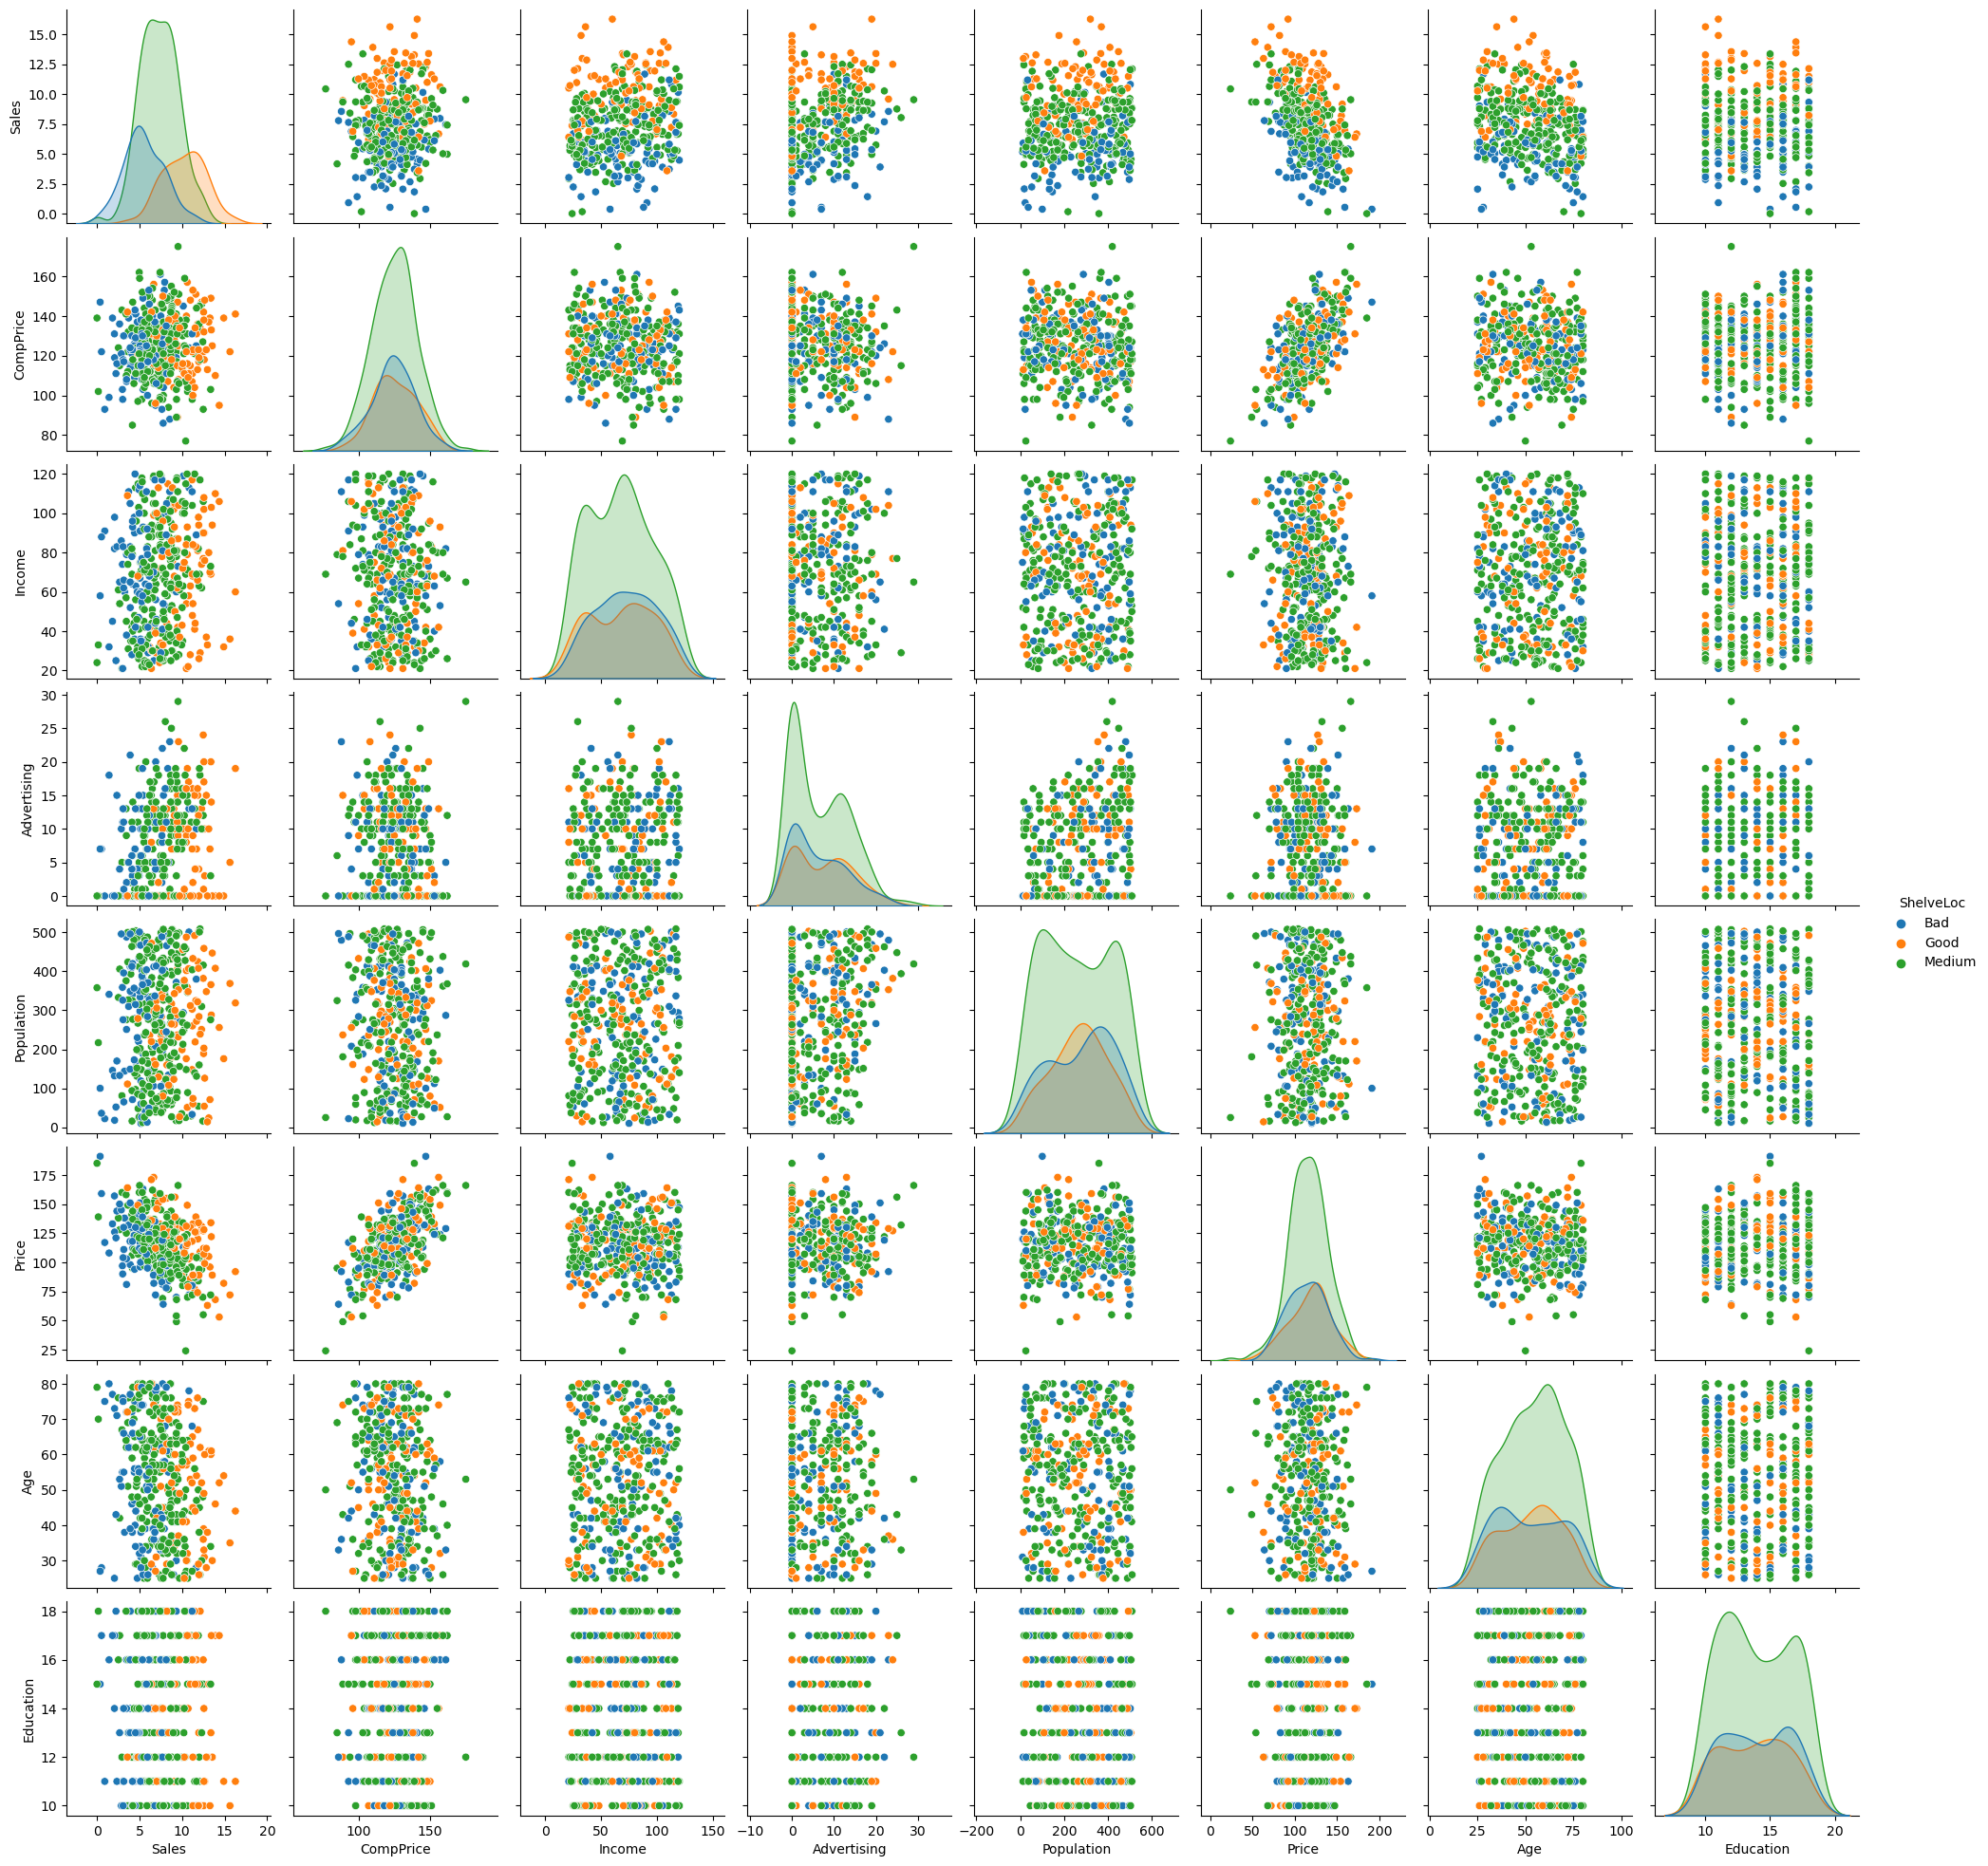

In [11]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dataframe, hue = 'ShelveLoc')

In [14]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(dataframe,columns=['Urban','US'], drop_first=True)

In [15]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [17]:

df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [18]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          3   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          3   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          3   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [19]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

Sales  CompPrice  Income  Advertising  Population  Price
0     9.50        138      73           11         276    120
1    11.22        111      48           16         260     83
2    10.06        113      35           10         269     80
3     7.40        117     100            4         466     97
4     4.15        141      64            3         340    128
..     ...        ...     ...          ...         ...    ...
395  12.57        138     108           17         203    128
396   6.14        139      23            3          37    120
397   7.41        162      26           12         368    159
398   5.94        100      79            7         284     95
399   9.71        134      37            0          27    120

[400 rows x 6 columns]

In [20]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [21]:
df['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [22]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [23]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price   ShelveLoc         Age   Education   Urban_Yes      US_Yes  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   115.795000    2.027500   53.322500   13.900000    0.705000    0.645000  
std     23.676664    0.672961   16.200297    2.620528    0.456614    0.479113  
min     24.000000    1.000000   25.000000   10.000000    0.000000    0.000000  
25%    100.000000    2.000000   39.750000   12.000000    0.000000    0.000000  
50%    117.000000    2.000000   54.500000   14.000000    1.000000    1.000000  
75%    131.000000    2.000000   66.000000   16.000000    1.000000    1.000000  
max    191.000000    3.000000   80.000000   18.000000    1.000000    1.000000

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [26]:
train_x.shape

(300, 6)

In [45]:
# Labels are the values we want to predict
labels = np.array(df['Income'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Income', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [46]:
features

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [47]:
feature_list

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [48]:
labels

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110, 113,  78,  94,  35,
        28, 117,  95,  32,  74, 110,  76,  90,  29,  46,  31, 119,  32,
       115, 118,  74,  99,  94,  58,  32,  38,  54,  84,  76,  41,  73,
        60,  98,  53,  69,  42,  79,  63,  90,  98,  52,  93,  32,  90,
        40,  64, 103,  81,  82,  91,  93,  71, 102,  32,  45,  88,  67,
        26,  92,  61,  69,  59,  81,  51,  45,  90,  68, 111,  87,  71,
        48,  67, 100,  72,  83,  36,  25, 103,  84,  67,  42,  66,  22,
        46, 113,  30,  97,  25,  42,  82,  77,  47,  69,  93,  22,  91,
        96, 100,  33, 107,  79,  65,  62, 118,  99,  29,  87,  35,  75,
        53,  88,  94, 105,  89, 100, 103, 113,  78,  68,  48, 100, 120,
        84,  69,  87,  98,  31,  94,  75,  42, 103,  62,  60,  42,  84,
        88,  68,  63,  83,  54, 119, 120,  84,  58,  78,  36,  69,  72,
        34,  58,  90,  60,  28,  21,  74,  64,  64,  58,  67,  73,  89,
        41,  39, 106, 102,  91,  24,  89, 107,  72,  71,  25, 11

In [49]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [50]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


In [51]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Sales')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  65.26


# RandomForestRegressor

In [52]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
num_trees = 100
max_features = 20
rf = RandomForestRegressor(n_estimators = num_trees, random_state = max_features)
# Train the model on training data
rf.fit(train_features, train_labels);

In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.26 degrees.


In [54]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.58 %.
